In [ ]:
def load_mnist(path, kind='train'): #This function is defined to load the MNIST dataset from the provided path.
    import os
    import gzip
    import numpy as np #handling files and numerical computations


    """Load MNIST data from `path`"""
    #store the file paths for the label and image files in the dataset.
    # The filenames are based on the kind argument, 
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)
#Loading Labels in, opens file in binary
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:
!wget -O train-images-idx3-ubyte.gz 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz'
!wget -O train-labels-idx1-ubyte.gz 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz'
!wget -O t10k-images-idx3-ubyte.gz 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz'
!wget -O t10k-labels-idx1-ubyte.gz 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz'

--2024-10-15 14:24:04--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz [following]
--2024-10-15 14:24:05--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [application/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  47.8MB/s    in 

Training data: (60000, 28, 28), Training labels: (60000,)
Test data: (10000, 28, 28), Test labels: (10000,)


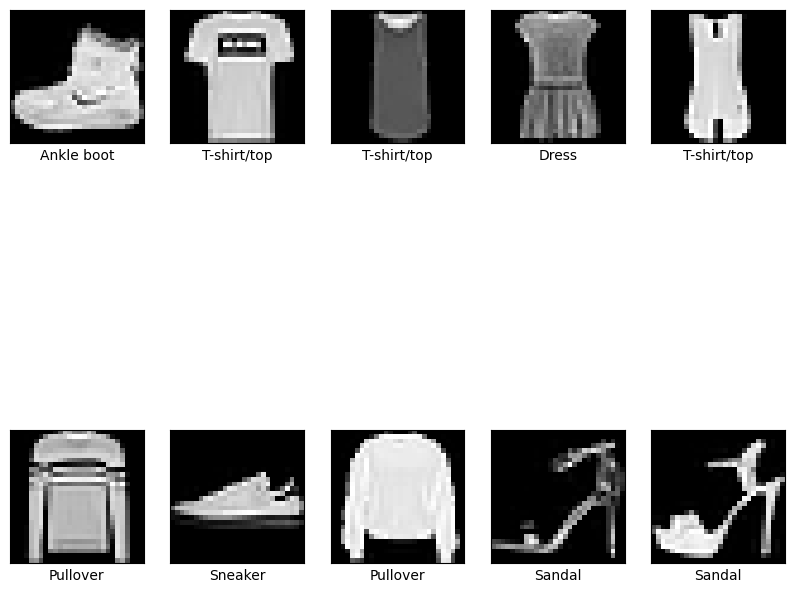

In [ ]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Path to your dataset inside Colab
data_path = '/content'

# Function to load MNIST data from gzip files
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path, f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28)

    return images, labels

# Load the train and test data
train_images, train_labels = load_mnist(data_path, kind='train')
test_images, test_labels = load_mnist(data_path, kind='t10k')

print(f"Training data: {train_images.shape}, Training labels: {train_labels.shape}")
print(f"Test data: {test_images.shape}, Test labels: {test_labels.shape}")

# Plot 10 images with their respective labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')  # Display one image
    plt.xlabel(class_names[train_labels[i]])  # Use the class name as label
plt.show()

In [ ]:
def preprocess_images(images: np.array) -> np.array:

    images = images / 255.0


    mean = 0.5  # Approximate mean for grayscale
    std = 0.5   # Approximate standard deviation for grayscale

    # Standardize the images
    images = (images - mean) / std

    # Flatten the images for k-NN (28*28 = 784)
    images = images.reshape(-1, 28*28) #-1 lets the function figure out the size of the first part (like how many images are in the batch) automatically, based on the other size (the number of pixels in each image). This makes it easier to reshape the data without needing to know the number of images in advance.

    return images

In [ ]:
from sklearn.model_selection import train_test_split

# Load and preprocess the training data (already handled)
train_images, train_labels = load_mnist('./', kind='train')
train_images = preprocess_images(train_images)

# Load and preprocess the test data (already handled)
test_images, test_labels = load_mnist('./', kind='t10k')
test_images = preprocess_images(test_images)

# Now, split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, shuffle=True)

# The test data remains the same, no need to split again
X_test, y_test = test_images, test_labels

# Print the shape of train, validation, and test sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (48000, 784)
Validation data shape: (12000, 784)
Test data shape: (10000, 784)
Training labels shape: (48000,)
Validation labels shape: (12000,)
Test labels shape: (10000,)


In [ ]:
def euclidean_distance(image: np.array, images: np.array) -> np.array:
    """
    Compute the euclidean distance between the image and the images.

    :param image: The image.
    :type image: np.array
    :param images: The images.
    :type images: np.array

    :return: The distances.
    :rtype: np.array
    """
    return np.sqrt(np.sum((images - image)**2, axis=1))

In [ ]:
def nearest_neighbor(
    new_image: np.array,
    train_images: np.array,
    train_labels: np.array
) -> int:
    """
    Compute the nearest neighbor of the image.

    :param new_image: The image.
    :type new_image: np.array
    :param train_images: The training images.
    :type train_images: np.array
    :param train_labels: The training labels.
    :type train_labels: np.array

    :return: The nearest neighbor.
    :rtype: int
    """
    distances = euclidean_distance(new_image, train_images)
    indices = np.argsort(distances)
    nearest_neighbor = train_labels[indices[0]]
    return nearest_neighbor


y_pred = nearest_neighbor(X_val[0], X_train, y_train)
print(y_pred)
print(f"Predicted: {class_names[y_pred]}, True: {class_names[y_val[0]]}")

n = 15
for i in range (n):
  y_pred = nearest_neighbor(X_val[i], X_train, y_train)
  print(f"Predicted: {class_names[y_pred]}, True: {class_names[y_val[i]]}")

8
Predicted: Bag, True: Bag
Predicted: Bag, True: Bag
Predicted: Bag, True: Bag
Predicted: Sneaker, True: Sneaker
Predicted: Pullover, True: Coat
Predicted: Bag, True: Bag
Predicted: Coat, True: Coat
Predicted: Trouser, True: Trouser
Predicted: T-shirt/top, True: T-shirt/top
Predicted: Coat, True: Coat
Predicted: Sandal, True: Sandal
Predicted: Shirt, True: Dress
Predicted: Sneaker, True: Sneaker
Predicted: Coat, True: Coat
Predicted: Ankle boot, True: Ankle boot
Predicted: Coat, True: Coat


In [ ]:
def k_nearest_neighbor(
    new_image: np.array,
    train_images: np.array,
    train_labels: np.array, k: int
) -> int:


    distances = euclidean_distance(new_image, train_images)
    indices = np.argsort(distances)
    ##Write code snippet to get the predicted labels of the new image/images
    nearest_neighbors = train_labels[indices[:k]]
    values, counts = np.unique(nearest_neighbors, return_counts=True)
    predicted_label = values[np.argmax(counts)]
    return predicted_label

In [ ]:
import tqdm
from PIL import Image
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix,f1_score)

Predicting: 100%|█████████████████████████████████████████████| 10000/10000 [34:42<00:00,  4.80it/s]



Predictions:  [9. 2. 1. 1. 0. 1. 4. 6. 5. 7.]
True:  [9 2 1 1 6 1 4 6 5 7]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.80      0.79      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.72      0.77      0.74      1000
       Dress       0.89      0.85      0.87      1000
        Coat       0.76      0.73      0.74      1000
      Sandal       0.99      0.85      0.92      1000
       Shirt       0.59      0.61      0.60      1000
     Sneaker       0.89      0.94      0.92      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.89      0.96      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



Predicting: 100%|█████████████████████████████████████████████| 10000/10000 [35:05<00:00,  4.75it/s]



Predictions:  [9. 2. 1. 1. 6. 1. 4. 6. 5. 7.]
True:  [9 2 1 1 6 1 4 6 5 7]
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.84      0.80      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.70      0.81      0.75      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.79      0.73      0.76      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.63      0.58      0.61      1000
     Sneaker       0.88      0.95      0.91      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Predicting: 100%|█████████████████████████████████████████████| 10000/10000 [34:27<00:00,  4.84it/s]



Predictions:  [9. 2. 1. 1. 6. 1. 4. 6. 5. 7.]
True:  [9 2 1 1 6 1 4 6 5 7]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.84      0.81      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.71      0.81      0.76      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.77      0.76      0.77      1000
      Sandal       0.99      0.81      0.89      1000
       Shirt       0.64      0.57      0.60      1000
     Sneaker       0.87      0.96      0.91      1000
         Bag       0.98      0.95      0.96      1000
  Ankle boot       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Predicting: 100%|█████████████████████████████████████████████| 10000/10000 [33:30<00:00,  4.97it/s]



Predictions:  [9. 2. 1. 1. 6. 1. 4. 6. 5. 7.]
True:  [9 2 1 1 6 1 4 6 5 7]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.85      0.81      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.71      0.80      0.75      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.77      0.75      0.76      1000
      Sandal       1.00      0.80      0.89      1000
       Shirt       0.62      0.56      0.59      1000
     Sneaker       0.86      0.96      0.91      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



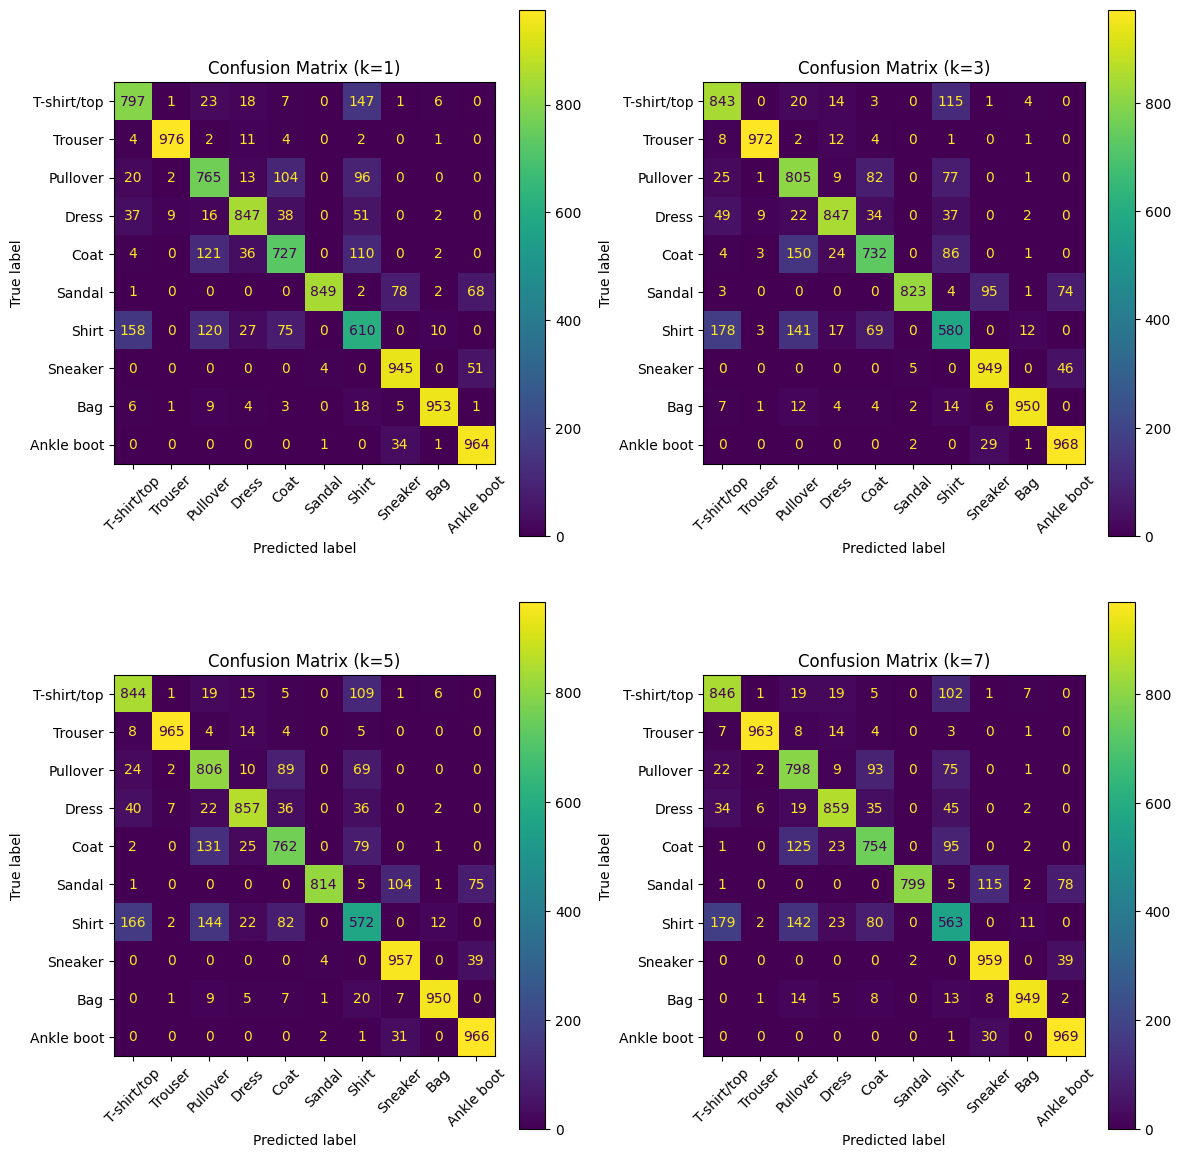

In [ ]:
def predict(test_images, train_images, train_labels, k):
    predictions = np.array([])

    for image in tqdm.tqdm(test_images, ncols=100, desc="Predicting"):
        predicted_label = k_nearest_neighbor(image, train_images, train_labels, k)
        predictions = np.append(predictions, predicted_label)
    return predictions

k_list = [1, 3, 5, 7]
all_predictions = []
all_confusion_matrices = []
for k in k_list:
    y_pred = predict(X_test, X_train, y_train, k)
    all_predictions.append(y_pred)
    print("\nPredictions: ", y_pred[:10])
    print("True: ", y_test[:10])

    cm = confusion_matrix(y_test, y_pred)
    all_confusion_matrices.append(cm)
    # Display classification report
    print(classification_report(y_test, y_pred, target_names=class_names))

# After the loop, plot all confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, k in enumerate(k_list):
    disp = ConfusionMatrixDisplay(confusion_matrix=all_confusion_matrices[i], display_labels=class_names)
    disp.plot(ax=axes[i], xticks_rotation=45)
    axes[i].set_title(f'Confusion Matrix (k={k})')

plt.tight_layout()
plt.show()

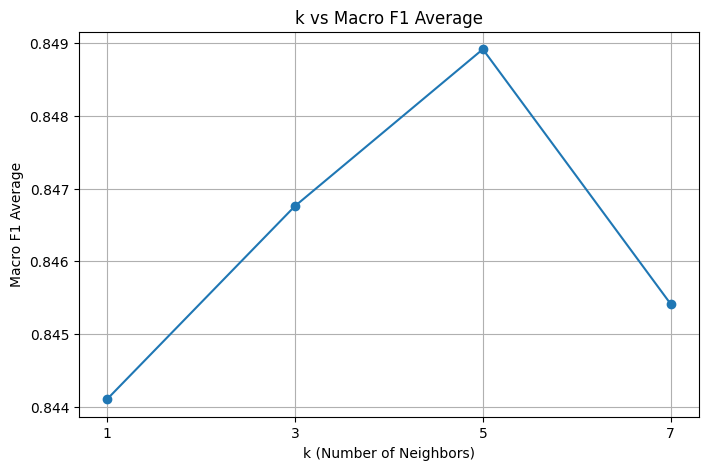

In [ ]:
macro_f1_scores = []

for i, k in enumerate(k_list):
    # Compute macro F1 score for the current k
    macro_f1 = f1_score(y_test, all_predictions[i], average='macro')
    macro_f1_scores.append(macro_f1)

# Plot k vs Macro F1 average
plt.figure(figsize=(8, 5))
plt.plot(k_list, macro_f1_scores, marker='o')
plt.title('k vs Macro F1 Average')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Macro F1 Average')
plt.xticks(k_list)  # Set x-ticks to be the values of k
plt.grid()
plt.show()